In [1]:
import sys
import os


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "src")))

In [20]:
from weather.data_loader import load_data
import importlib
import weather.preprocessing
importlib.reload(weather.preprocessing)
from weather.preprocessing import plot_target_distribution, boxplot_outliers_per_column, plot_weather_type_boxplots, plot_weather_type_bar, plot_skewness , result_clean_iqr

In [3]:
file_path = os.path.join('..', 'data', 'raw', 'weather_classification_data.csv')
df = load_data(file_path)

In [5]:
print(df.head())

   Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0         14.0        73         9.5               82.0  partly cloudy   
1         39.0        96         8.5               71.0  partly cloudy   
2         30.0        64         7.0               16.0          clear   
3         38.0        83         1.5               82.0          clear   
4         27.0        74        17.0               66.0       overcast   

   Atmospheric Pressure  UV Index  Season  Visibility (km)  Location  \
0               1010.82         2  Winter              3.5    inland   
1               1011.43         7  Spring             10.0    inland   
2               1018.72         5  Spring              5.5  mountain   
3               1026.25         7  Spring              1.0   coastal   
4                990.67         1  Winter              2.5  mountain   

  Weather Type  
0        Rainy  
1       Cloudy  
2        Sunny  
3        Sunny  
4        Rainy  


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [ ]:
print("Jumlah missing value:")
df.isnull().sum()

Jumlah missing value:


Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [ ]:
df.shape

(13200, 11)

In [ ]:
print("Statistik Deskriptif: \n", df.describe())

Statistik Deskriptif: 
         Temperature      Humidity    Wind Speed  Precipitation (%)  \
count  13200.000000  13200.000000  13200.000000       13200.000000   
mean      19.127576     68.710833      9.832197          53.644394   
std       17.386327     20.194248      6.908704          31.946541   
min      -25.000000     20.000000      0.000000           0.000000   
25%        4.000000     57.000000      5.000000          19.000000   
50%       21.000000     70.000000      9.000000          58.000000   
75%       31.000000     84.000000     13.500000          82.000000   
max      109.000000    109.000000     48.500000         109.000000   

       Atmospheric Pressure      UV Index  Visibility (km)  
count          13200.000000  13200.000000     13200.000000  
mean            1005.827896      4.005758         5.462917  
std               37.199589      3.856600         3.371499  
min              800.120000      0.000000         0.000000  
25%              994.800000      1.00000

In [ ]:
print("Jumlah data duplikat:", df.duplicated().sum())

Jumlah data duplikat: 0


In [ ]:
print("Nilai unik per kolom:")
for col in df.columns:
    print(f"{col}: {df[col].nunique()}")

Nilai unik per kolom:
Temperature: 126
Humidity: 90
Wind Speed: 97
Precipitation (%): 110
Cloud Cover: 4
Atmospheric Pressure: 5456
UV Index: 15
Season: 4
Visibility (km): 41
Location: 3
Weather Type: 4


In [ ]:
print(df.dtypes)

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object


In [4]:
numerical_column = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
kategorical_column = ['Cloud Cover', 'Season', 'Location', 'Weather Type']

In [6]:
for col in kategorical_column:
    print(f"Kolom: {col}")
    print(df[col].unique())

Kolom: Cloud Cover
['partly cloudy' 'clear' 'overcast' 'cloudy']
Kolom: Season
['Winter' 'Spring' 'Summer' 'Autumn']
Kolom: Location
['inland' 'mountain' 'coastal']
Kolom: Weather Type
['Rainy' 'Cloudy' 'Sunny' 'Snowy']


In [7]:
for col in numerical_column:
    unique_vals = df[col].value_counts().index.to_list()
    print(f"Kolom: {col}")
    print(f"Nilai unik (diurutkan berdasarkan frekuensi):\n {unique_vals}\n")

Kolom: Temperature
Nilai unik (diurutkan berdasarkan frekuensi):
 [32.0, 24.0, 26.0, 30.0, 22.0, 28.0, 27.0, 34.0, 31.0, 23.0, 25.0, 21.0, 29.0, 20.0, 33.0, 11.0, 15.0, 19.0, 10.0, 17.0, 12.0, 18.0, 14.0, 13.0, 2.0, 16.0, -4.0, -2.0, 1.0, -7.0, -6.0, -8.0, 0.0, -10.0, 4.0, -1.0, 3.0, -3.0, -9.0, -5.0, 36.0, 41.0, 37.0, 42.0, 44.0, 35.0, 38.0, 40.0, 43.0, 39.0, 48.0, 47.0, 9.0, -17.0, 49.0, 45.0, -12.0, 5.0, 7.0, 46.0, -13.0, -11.0, 6.0, -16.0, -15.0, 8.0, -14.0, -19.0, -20.0, -18.0, 51.0, 52.0, 60.0, 66.0, 53.0, 58.0, 63.0, 57.0, 55.0, 65.0, 64.0, 50.0, 54.0, 56.0, 67.0, 76.0, 70.0, 68.0, 59.0, 62.0, 61.0, 73.0, 75.0, 72.0, 71.0, 77.0, 80.0, -22.0, 82.0, -24.0, 84.0, -21.0, 90.0, 91.0, 74.0, 97.0, 81.0, 69.0, 94.0, 99.0, -23.0, 85.0, 92.0, 107.0, 78.0, 98.0, 109.0, -25.0, 88.0, 100.0, 89.0, 102.0, 86.0, 108.0, 87.0, 95.0]

Kolom: Humidity
Nilai unik (diurutkan berdasarkan frekuensi):
 [76, 60, 67, 63, 70, 69, 73, 68, 65, 78, 66, 77, 61, 71, 72, 74, 62, 79, 64, 75, 96, 91, 89, 86, 81, 8

Distribusi Label: Weather Type
Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64


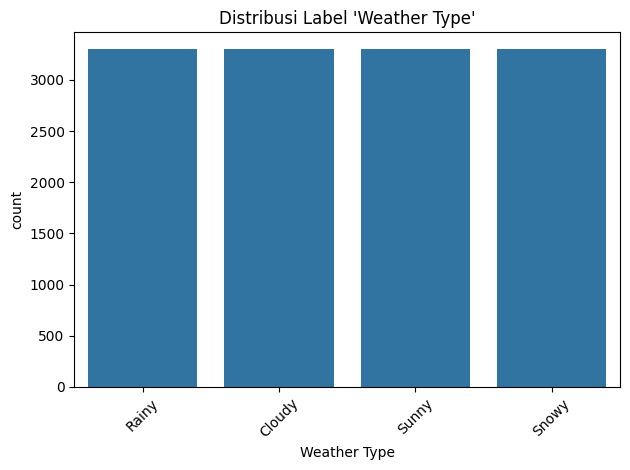

In [13]:
plot_target_distribution(df, 'Weather Type')

In [ ]:
# Lihat Outlier
plot_weather_type_boxplots(df, kategorical_column, numerical_column)

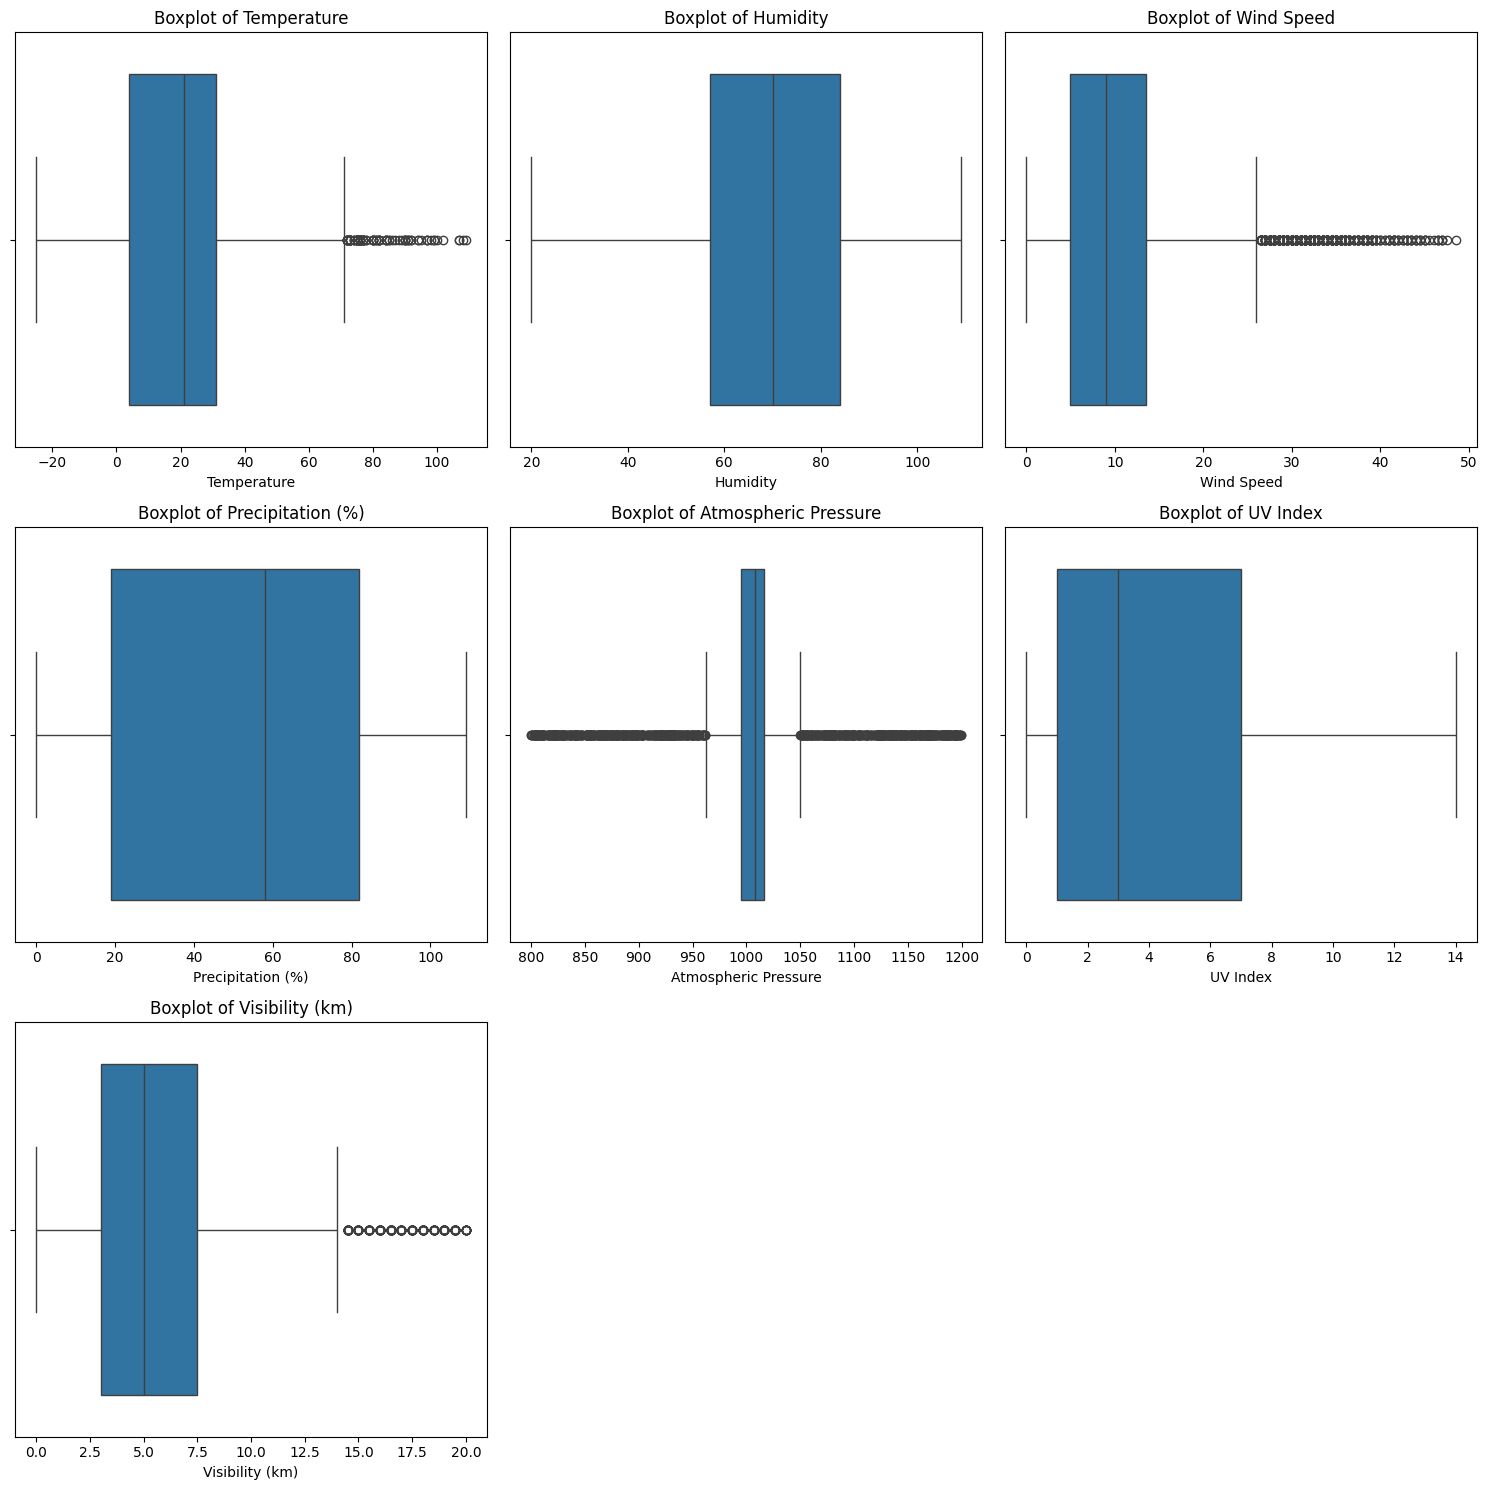

In [15]:
boxplot_outliers_per_column(df, numerical_column, cols_per_row=3)

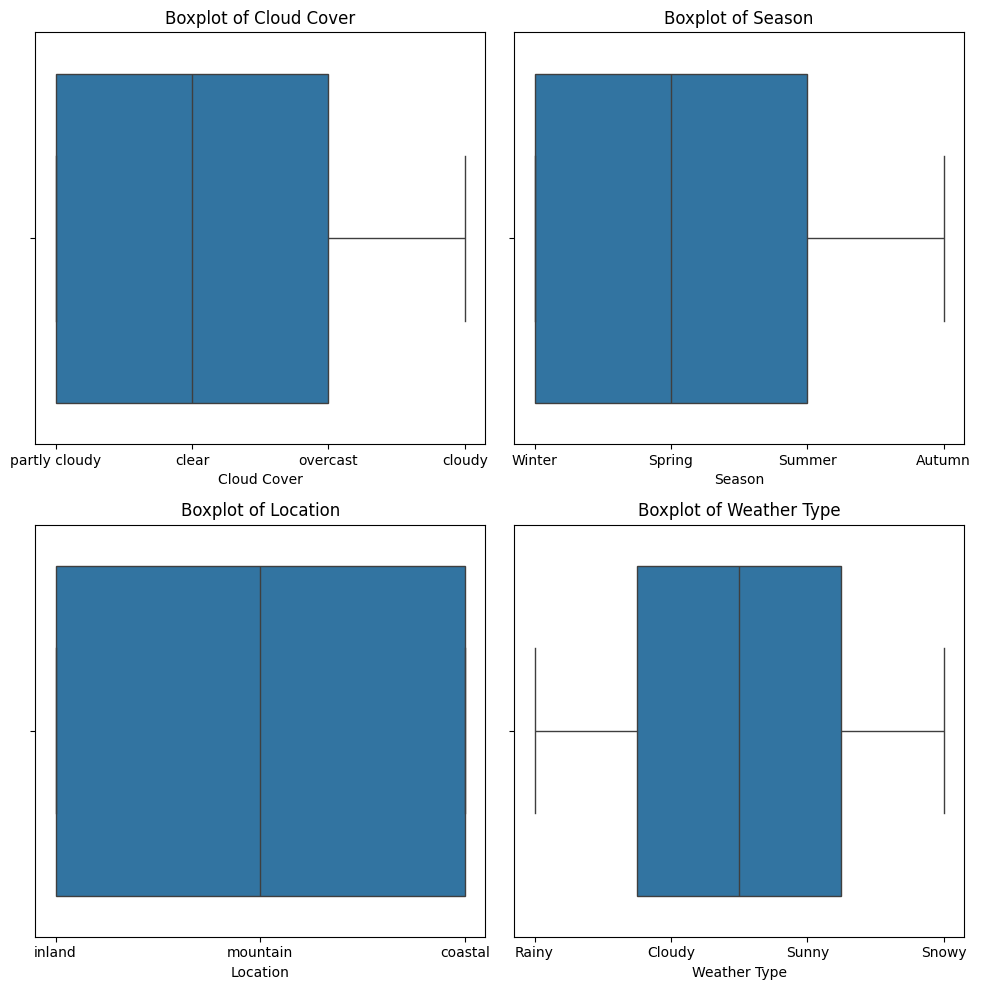

In [17]:
boxplot_outliers_per_column(df, kategorical_column, cols_per_row=2)

In [ ]:
plot_weather_type_bar(df, 'Weather Type', numerical_columns)

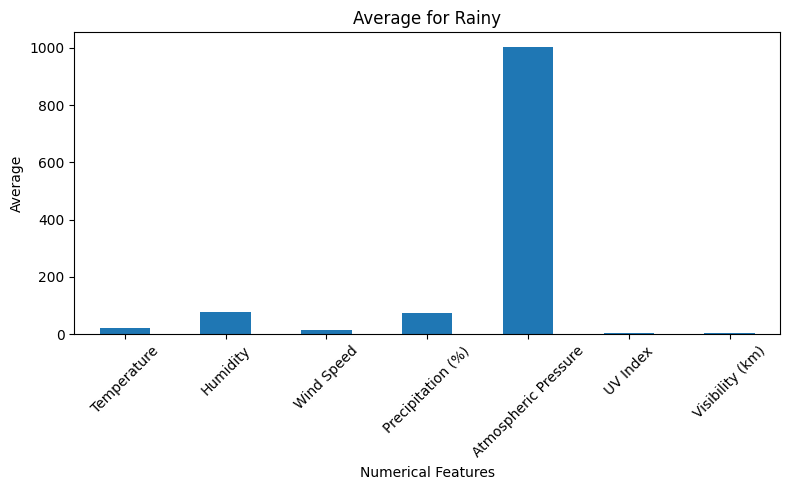

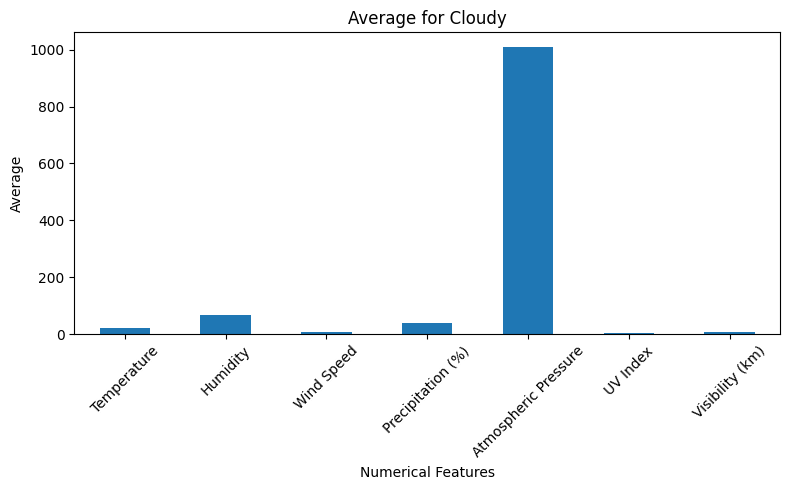

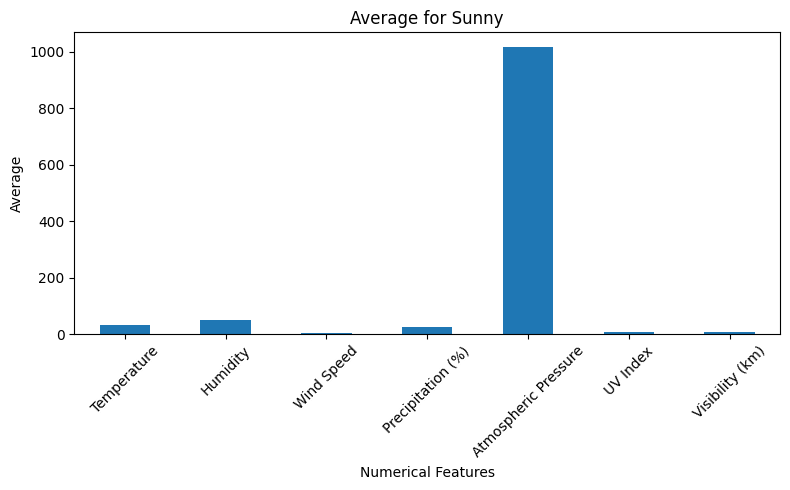

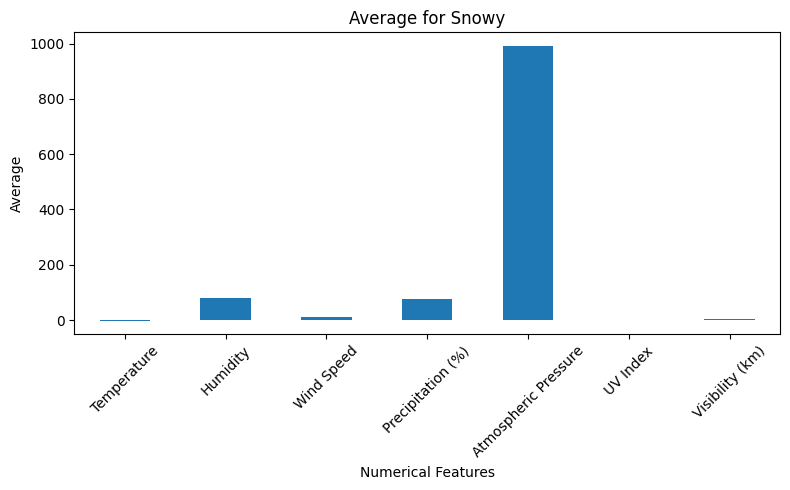

In [19]:
plot_weather_type_bar(df, 'Weather Type', numerical_column, cols_per_row=2)

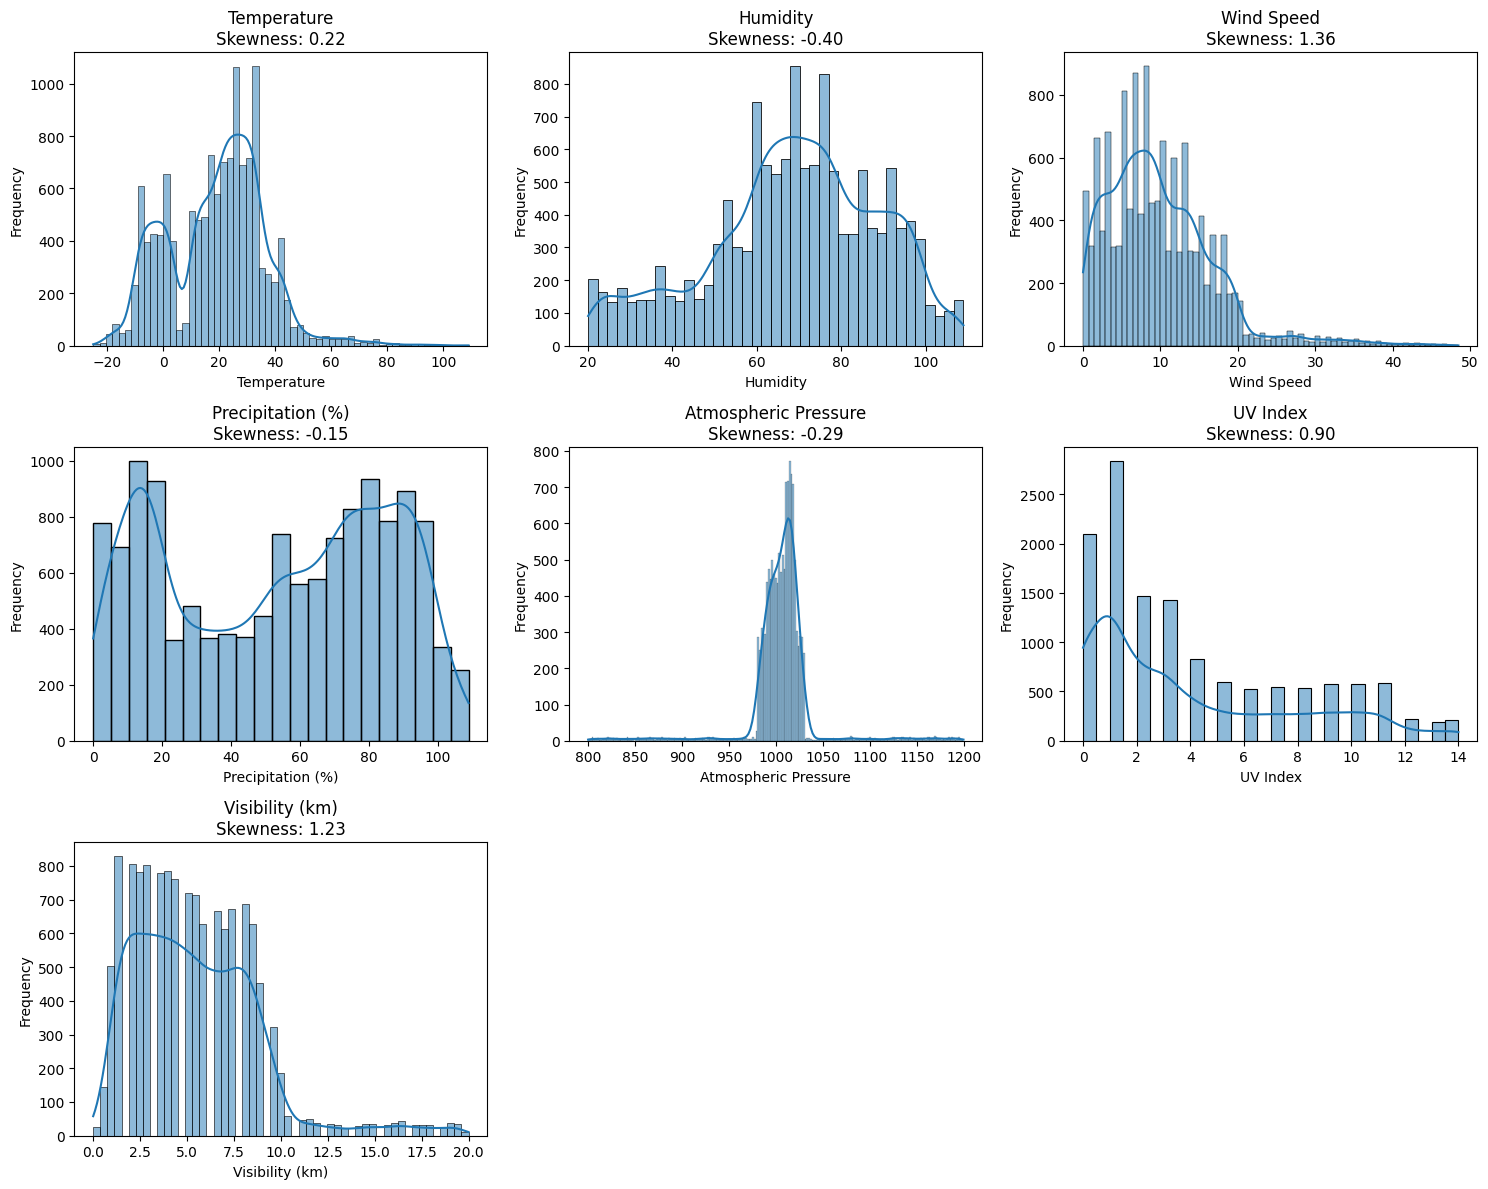

In [21]:
plot_skewness(df, numerical_column, cols_per_row=3)

In [11]:
df_outliers = df.copy()

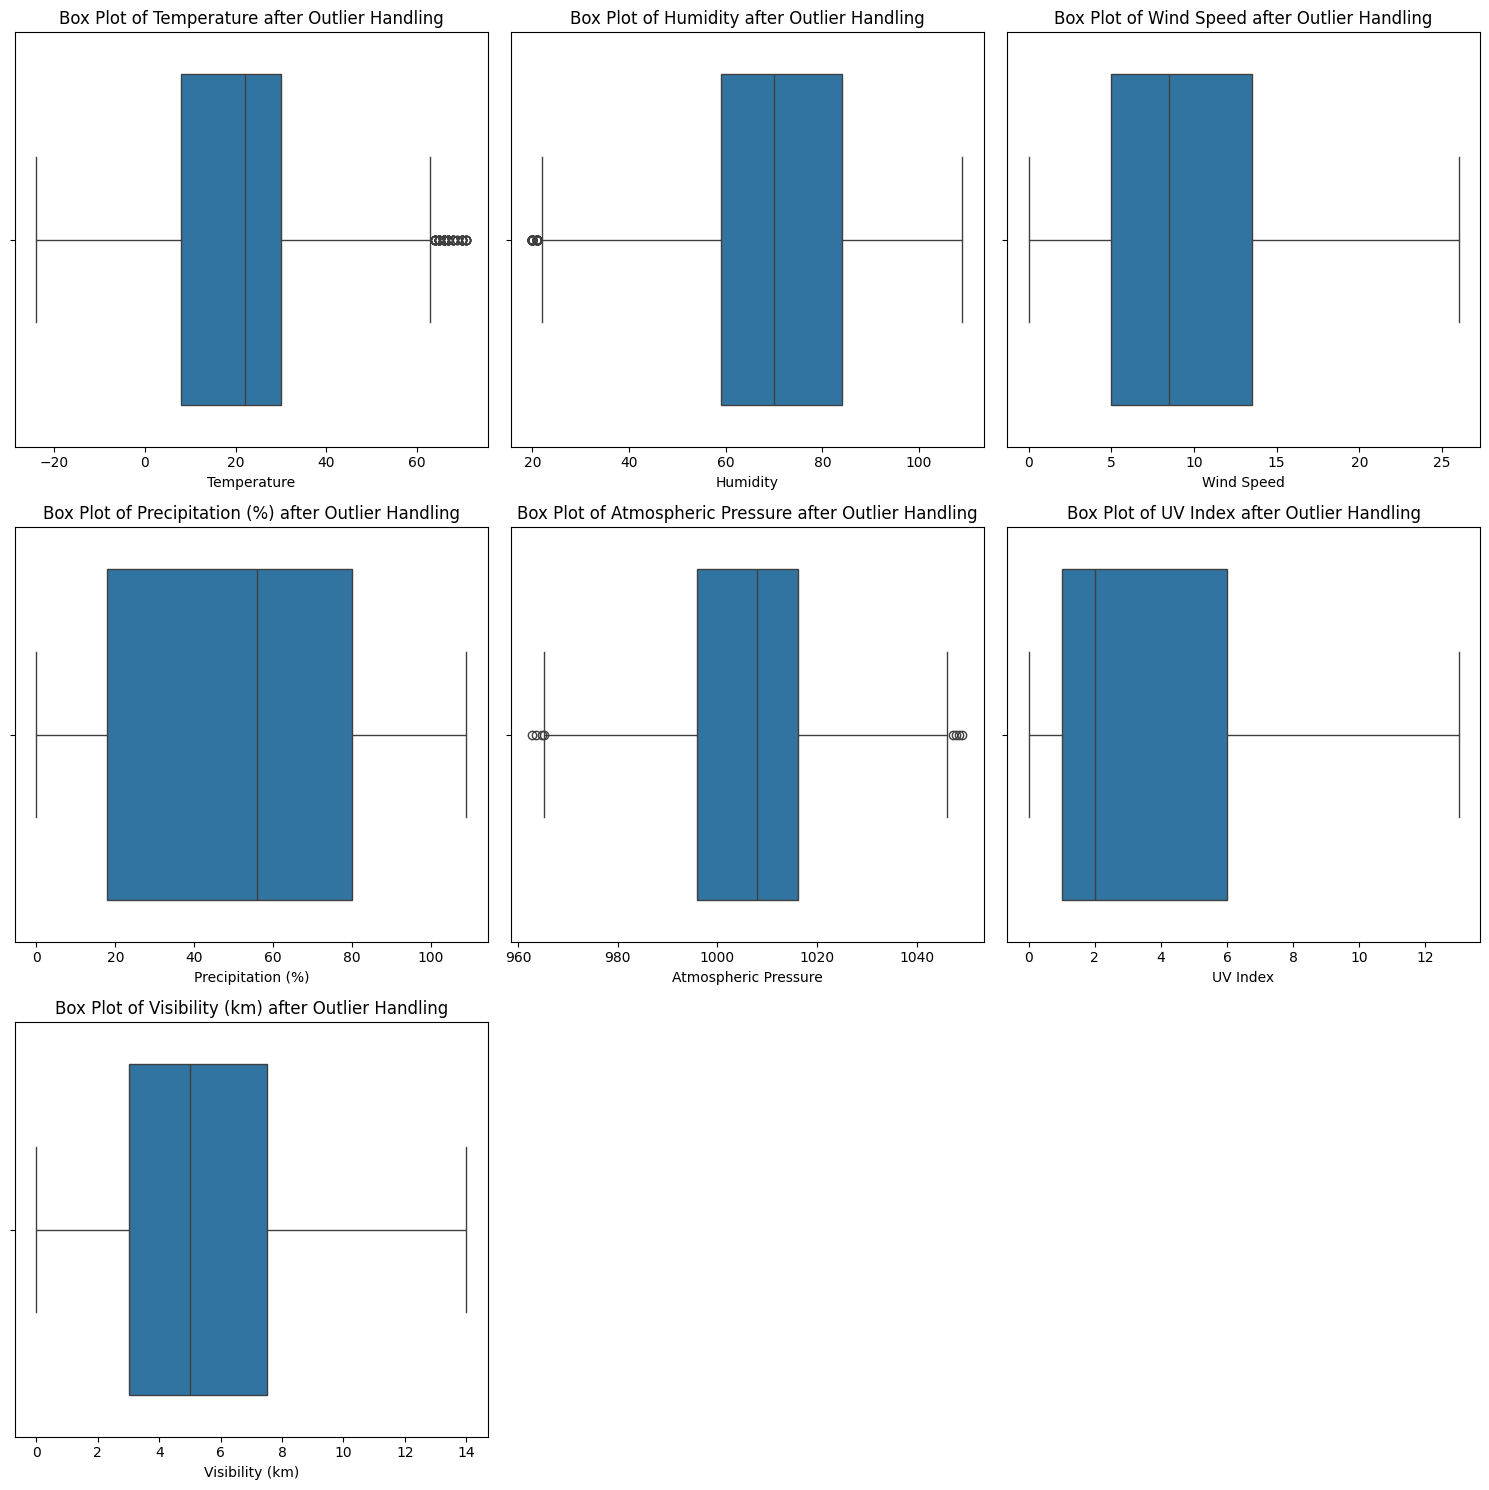

In [22]:
result = result_clean_iqr(df_outliers, numerical_column, 1.5, cols_per_row=3)

In [24]:
df_outliers

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [25]:
folder_path = os.path.join('..', 'data', 'processed')

file_path = os.path.join(folder_path, 'after_preprocessed.csv')
df_outliers.to_csv(file_path, index=False)

print(f"Data berhasil disimpan di: {file_path}")

Data berhasil disimpan di: ..\data\processed\after_preprocessed.csv
